<a href="https://colab.research.google.com/github/NickBoychenko/248/blob/main/M248QuizWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) List TEN things you learned during Weeks 1 and 2 and FIVE things you still don't understand or are curious and would like to learn about.

#Things I've learned.
1. A uniform distribution is more evenly spreadout.
2. A gaussian/normal distribution has a peak where the probablity is higher.
3. What Bivarate means and how to use it.
4. How to create classes in Python.
5. How to turn a list into a dictionary using i.\__dict__\.
6. How to convert categorical data into numerical data.
7. What a contour and surface plot is.
8. What the general formula for a 2d bivarate gaussian is.
9. What a colon means when used as an index.
10. How to make and label 3D plots.

#Things I'm curious about or don't understand.
1. I don't understand why we'd set categorical data into numbers if they aren't caomparable.
2. When you'd want to import a library as something instead of just importing it.
3. The difference between an array and a list.
4. What the double underscores before and after init and dict do.
5. If there's a difference in using " or ' for strings.

# 2) What is the difference between the uniform distribution and the gaussian distribution?

The uniform distribution has more of an even probability throughout the distrbution, and the gaussian distribution is more likely to have values toward the center of the distribution.

# 3) Let's plot the two dimensional bivariate Gaussian distribution
The general formula for the two dimensional [bivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is:
$$g(x,y)=\frac{1}{\sqrt{(2\pi)^2\det\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}}}e^-\left\{{\frac{1}{2}\begin{pmatrix} x-\mu_1& y-\mu_2\end{pmatrix}\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}^{-1}\begin{pmatrix}x-\mu_1\\y-\mu_2\end{pmatrix}}\right\}$$

This can be compacted into 
$$g(x,y)=\frac{1}{\sqrt{(2\pi)^2\det(\Sigma)}}e^-\left\{{\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}\right\}$$

Compare the above formula to the one dimensional Gaussian distribution function:
$$g(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- When there is only one random variable you only have one mean $\mu$ and one standard deviation $\sigma$.

- When there are two random variables, you have two means $\begin{pmatrix}\mu_1\\\mu_2\end{pmatrix}$, two standard deviations $\begin{pmatrix}\sigma_1\\\sigma_2\end{pmatrix}$, and the product $\sigma^2$ will be replaced by the covariance matrix $\Sigma=\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}$ and its determinant. Here, $\rho$ is the correlation between the two random variables.

The following code plots the bivariate normal distribution. Read the code carefully then explain it step by step in the follwing cell.

Text(0.5, 0.92, 'Bivariate Gaussian distribution')

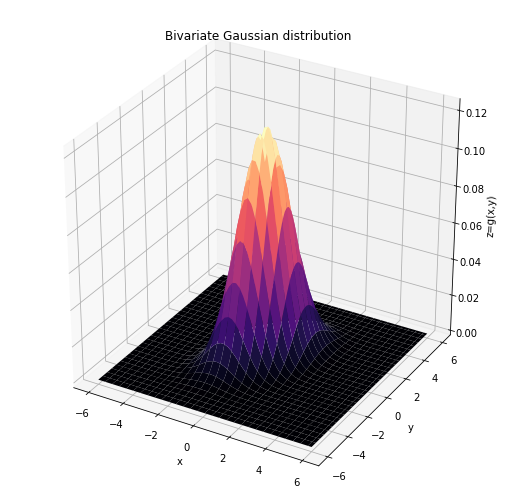

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
X = np.linspace(-6, 6, n)
Y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(X, Y)
# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (60,60,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    """This function returns the bivariate Gaussian distribution on array pos.
       pos is an array constructed by packing the meshed arrays of variables x and y into its last dimension.
    """
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized
    # way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = fig.gca(projection='3d')
picture.plot_surface(X, Y, Z, cmap=cm.magma) 
# set labels for axes
picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=g(x,y)')
# set image title
picture.set_title('Bivariate Gaussian distribution')     

# Explain the above code line by line.

import numpy as np

import matplotlib.pyplot as plt

from matplotlib import cm

from mpl_toolkits import mplot3d

**Imports Libraries**

*#Our 2-dimensional distribution will be over variables X and Y*

n = 60  *number of grid points on each axis*

**Define n to be 60**

X = np.linspace(-6, 6, n)

**Divides the interval of the x axis from -6 to 6 into n subintervals**

Y = np.linspace(-6, 6, n)

**Divides the interval of the y axis from -6 to 6 into n subintervals**

X, Y = np.meshgrid(X, Y)

**Creates the two dimensional grid**

*#Stack X and Y into a single 3-dimensional array*

position = np.empty(X.shape + (2,)) *this gives a tensor of shape (60,60,2)*

**Gives it a shape of (60, 60, 2)**

position[:, :, 0] = X

**sets the position of X**

position[:, :, 1] = Y

**sets the position of Y**



*#Mean vector and covariance matrix*

mu_1=0

**sets the first mu to 0**

mu_2=0

**sets the second mu to 0**

mu = np.array([mu_1, mu_2])

**creates an array mu using mu_1 and mu_2**

Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

**creates an array Sigma using [1, 3/5] and [3/5, 2]**



def multivariate_gaussian(position, mu, Sigma):

**creates a method with parameters position, mu, and Sigma**

  This function returns the bivariate Gaussian distribution on array pos.

  **Comment**

  pos is an array constructed by packing the meshed arrays of variables 
  x and y into its last dimension. 
    
  Sigma_det = np.linalg.det(Sigma)
  
  **Sigma_det gets the value of the determinate of Sigma**
    
  Sigma_inv = np.linalg.inv(Sigma)

  **Sigma_inv gets the value of the inverse of Sigma**
    
  N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.

  **N gets the value of the normalizing constant**
    
  fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) 
  *#This einsum or Einstein sum calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized*
    
  **fac is an arrray based on the Einstein Summation**

  *#way across all the input variables.*

  return np.exp(-fac / 2) / N

  **Returns the exponential of -fac / 2 all over N**


*#The distribution on the variables X, Y stacked into position tensor.*

Z = multivariate_gaussian(position, mu, Sigma)

**Z is a multivariate gaussian distribution using the method we created**

*#Create a surface plot*

fig = plt.figure(figsize=(9,9))

**Creates a figure called fig**

picture = fig.gca(projection='3d')

**Makes the projection 3d**

picture.plot_surface(X, Y, Z, cmap=cm.magma) 

**Plots the surface**

*# set labels for axes*

picture.set_xlabel('x')

**Sets the x label to x**

picture.set_ylabel('y')

**Sets the y label to y**

picture.set_zlabel('z=g(x,y)')

**Sets the z label to z=g(x,y)**

*# set image title*

picture.set_title('Bivariate Gaussian distribution')  

**The title of the image**



# 4) Now let's sample n points $(x_i,y_i)$ from the bivariate Gaussian 
distribution and use seaborn library to plot the sampled points in the x-y plane. These should look like the shadow in the $x$-$y$ plane of the surface plot of $g(x,y)$ above.
Read the following code then explain it line by line in the next cell.

Text(0.5, 1.0, 'Scatterplot for 6000 points sampled from the gaussian bivariate distribution')

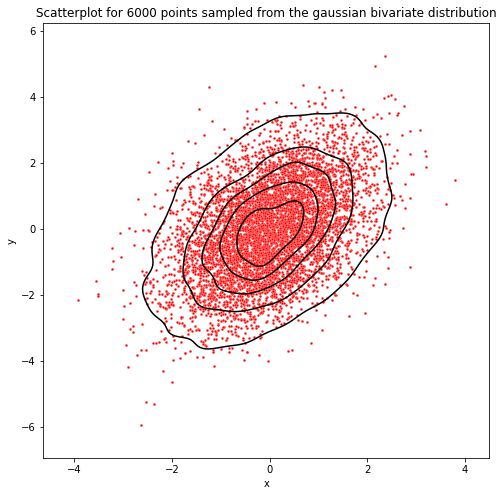

In [ ]:
import seaborn as sns

# Simulate data from a bivariate Gaussian
n = 6000
mean = [0, 0]
cov = [(1, 3/5), (3/5, 2)]
x, y = np.random.multivariate_normal(mean, cov, n).T

# Draw a scatterplot with density contours
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=x, y=y, s=7, color="r")
sns.kdeplot(x=x, y=y, levels=6, color="k", linewidths=1.5)
# set labels for axes
plt.xlabel('x')
plt.ylabel('y')
# set image title
plt.title('Scatterplot for {} points sampled from the gaussian bivariate distribution'.format(n))

# Explain the above code line by line.

import seaborn as sns

**Imports the seaborn library as sns**

*# Simulate data from a bivariate Gaussian*

n = 6000

**Sets n to 6000**

mean = [0, 0]

**Mean is set to [0, 0]**

cov = [(1, 3/5), (3/5, 2)]

**cov is [(1, 3/5), (3/5), 2)]**

x, y = np.random.multivariate_normal(mean, cov, n).T

**x and y are set to random normal multivariate distributions using mean,
cov, and n**

*# Draw a scatterplot with density contours*

fig = plt.figure(figsize=(8,8))

**sets fig to a plot of size 8 in x and y direction**

sns.scatterplot(x=x, y=y, s=7, color="r")

**Makes a scatterplot with x, y, size of 7, and color of red**

sns.kdeplot(x=x, y=y, levels=6, color="k", linewidths=1.5)

**Plots the lines with x, y, 6 levels, color of k, and a width of 1.5**

*# set labels for axes*

plt.xlabel('x')

**Labels the x axis as x**

plt.ylabel('y')

**Labels the y axis as y**

*# set image title*

plt.title('Scatterplot for {} points sampled from the gaussian bivariate distribution'.format(n))

**Makes the title as the string**



# 5) Create a class for a car dealership called cars

1. The instances belonging to the class should have 5 attributes: make, model, year, color, and VIN number. 
2. Then specify 10 instances belonging to this class, and call certain attributes for three of these instances. 
3. Convert these instances into a dictionary then a data frame using one line of code. 
4. Create a histogram for each attribute. 

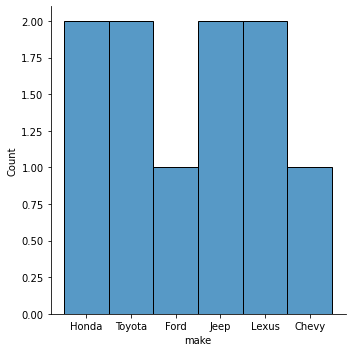

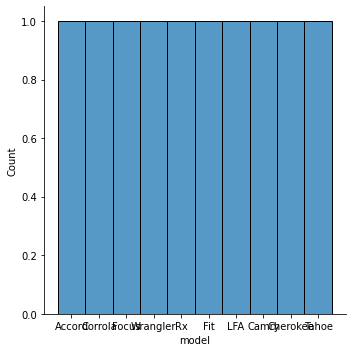

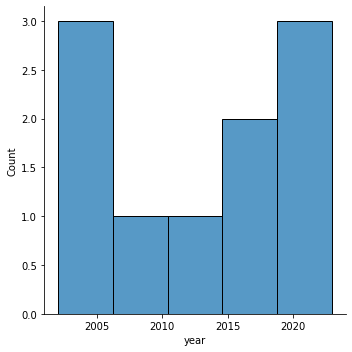

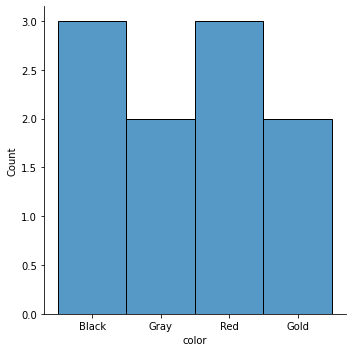

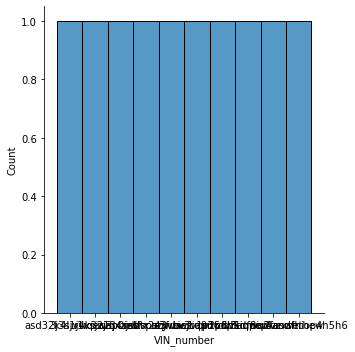

In [ ]:
import pandas
import seaborn

class cars:
  def __init__(self, make, model, year, color, VIN_number):
    self.make = make
    self.model = model
    self.year = year
    self.color = color
    self.VIN_number = VIN_number

car0 = cars("Honda", "Accord", 2005, "Black", "asd32k4l1j4k32j3j")
car1 = cars("Toyota", "Corrola", 2015, "Gray", "3j3sjvwqer134szsf")
car2 = cars("Ford", "Focus", 2009, "Red", "r1vsjwap0iebvcazy")
car3 = cars("Jeep", "Wrangler", 2017, "Black", "avcxzjsdtr243vbw1")
car4 = cars("Lexus", "Rx", 2021, "Black", "mlkspoqwziejca936")
car5 = cars("Honda", "Fit", 2004, "Red", "a3fvacziqpritdvf1")
car6 = cars("Lexus", "LFA", 2022, "Gold", "bv3v1v2vdb5iqpor6")
car7 = cars("Toyota", "Camry", 2002, "Gray", "op1p6i3aqwq2vzxsh")
car8 = cars("Jeep", "Cherokee", 2012, "Red", "qvkdfniu4anwethew")
car9 = cars("Chevy", "Tahoe", 2023, "Gold", "8ewfasdfhiop4h5h6")
all_cars = [car0, car1, car2, car3, car4, car5, car6, car7, car8, car9]

df = pandas.DataFrame([i.__dict__ for i in all_cars])

seaborn.displot(df.iloc[:, 0])
seaborn.displot(df.iloc[:, 1])
seaborn.displot(df.iloc[:, 2])
seaborn.displot(df.iloc[:, 3])
seaborn.displot(df.iloc[:, 4])

# 6) Consider the following image of car data
![image](https://github.com/NickBoychenko/248/blob/main/carData.png?raw=1)

1. Write a class that defines a blueprint for the data in this table and the associated attributes.
2. Enter all the instances pictured in the table.
3. Convert the instances into dictionaries then create the data frame similar to the above table.
4. Plot a histogram showing the distribution of the gas tank capacity of the cars.
5. Convert the categorical data in the Type column to numerical data reflecting its order.

              model country  car_type  weight  turning_circle  displacement  \
0     Acura Integra   Japan         2    2700              37           112   
1   Acura Legend V5   Japan         3    3265              42           163   
2          Audi 100   Other         3    2935              39           141   
3           Audi 80   Other         1    2670              35           121   
4           Audi 90   Other         1    2790              35           141   
5          BMW 325i   Other         1    2895              35           152   
6          BMW 545i   Other         3    3640              39           209   
7     Buick Century     USA         3    2880              41           151   
8  Buick Electra V6     USA         4    3350              43           231   

   horsepower  gas_tank_size  
0         130           13.2  
1         160           18.0  
2         130           21.1  
3         106           15.9  
4         130           15.9  
5         168          

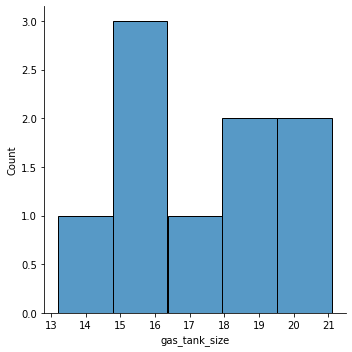

In [ ]:
import pandas
import seaborn

class Car:
  def __init__(self, model, country, car_type, weight, turning_circle, 
               displacement, horsepower, gas_tank_size):
    self.model = model
    self.country = country
    self.car_type = car_type
    self.weight = weight
    self.turning_circle = turning_circle
    self.displacement = displacement
    self.horsepower = horsepower
    self.gas_tank_size = gas_tank_size

c1 = Car("Acura Integra", "Japan", "Small", 2700, 37, 112, 130, 13.2)
c2 = Car("Acura Legend V5", "Japan", "Medium", 3265, 42, 163, 160, 18)
c3 = Car("Audi 100", "Other", "Medium", 2935, 39, 141, 130, 21.1)
c4 = Car("Audi 80", "Other", "Compact", 2670, 35, 121, 106, 15.9)
c5 = Car("Audi 90", "Other", "Compact", 2790, 35, 141, 130, 15.9)
c6 = Car("BMW 325i", "Other", "Compact", 2895, 35, 152, 168, 16.4)
c7 = Car("BMW 545i", "Other", "Medium", 3640, 39, 209, 208, 21.1)
c8 = Car("Buick Century", "USA", "Medium", 2880, 41, 151, 110, 15.7)
c9 = Car("Buick Electra V6", "USA", "Large", 3350, 43, 231, 165, 18)

all_c = [c1, c2, c3, c4, c5, c6, c7, c8, c9]

df = pandas.DataFrame([i.__dict__ for i in all_c])

seaborn.displot(df.iloc[:, 7])

numerical={"car_type":{"Compact":1, "Small":2, "Medium":3, "Large":4}}
num_df = df.replace(numerical)
print(num_df)

# 7) Make a three dimensional contour or surface plot for the function

$$f(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10\left(\frac{x}{5}-x^3-y^5\right)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2 - y^2}$$

Text(0.5, 0.92, '3-dimensional contour plot')

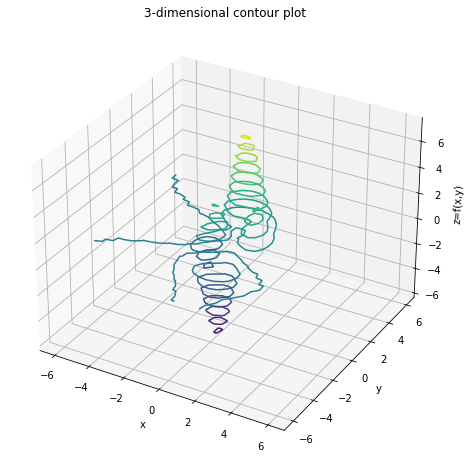

In [ ]:
from numpy.ma.core import exp
import numpy as np
import matplotlib.pyplot as plt


def f(x,y):
  return 3*(1-x)**2*exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*exp(-x**2-y**2)-(1/3)*exp(-(x+1)**2-y**2)

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X,Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(figsize=(8, 8))
picture = plt.axes(projection='3d')
picture.contour3D(X,Y,Z,20)

picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=f(x,y)')

picture.set_title('3-dimensional contour plot')